# COMP 551 Assignment 1
By: Sung Jun Lee, Joseph Boehm, Namdar Kabolinejad

8 February 2022

# Imports

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(70)

# Data Preprocessing

Load in the datasets hepatitis.data and messidor_features.arff before running the following code

In [ ]:
hep_data = pd.read_csv("hepatitis.data",names=["Class", "Age","Sex", "Steroid", 
                                         "Antivirals", "Fatigue", "Malaise", 
                                         "Anorexia", "Liver Big", "Liver Firm", 
                                         "Spleen Palpable", "Spiders" ,"Arcites", 
                                         "Varives", "Bilirubin", "ALK Phosphate", 
                                         "SGOT", "Albumin",  "Histology"],usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19])
mess_data = arff.loadarff('messidor_features.arff')

cols = ["QA", "Pre-Screen", "MA1", "MA2", "MA3", "MA4", "MA5", "MA6", "EXU1", "EXU2", "EXU3", "EXU4", "EXU5", "EXU6", "EXU7", "EXU8", "Distance", "Diameter", "AM/FM", "Class"]
mess_data = pd.DataFrame(mess_data[0]).set_axis(cols, axis=1, inplace=False)
mess_data = mess_data.loc[:, ["Class"] + cols[:19]]
hep_data





Class  Age  Sex Steroid  ...  ALK Phosphate SGOT Albumin Histology
0        2   30    2       1  ...             85   18     4.0         1
1        2   50    1       1  ...            135   42     3.5         1
2        2   78    1       2  ...             96   32     4.0         1
3        2   31    1       ?  ...             46   52     4.0         1
4        2   34    1       2  ...              ?  200     4.0         1
..     ...  ...  ...     ...  ...            ...  ...     ...       ...
150      1   46    1       2  ...              ?  242     3.3         2
151      2   44    1       2  ...            126  142     4.3         2
152      2   61    1       1  ...             75   20     4.1         2
153      2   53    2       1  ...             81   19     4.1         2
154      1   43    1       2  ...            100   19     3.1         2

[155 rows x 19 columns]

In [ ]:
def clean_hep_df(df):
  nan_value = float("NaN")
  df.replace("?", nan_value, inplace = True)
  df.dropna(inplace=True)
  for col in df:
    df[col] = df[col].astype(float)
  return df

def clean_mess_df(df):
  df = df.replace(b'0', 0)
  df = df.replace(b'1', 1)
  # this following line remove all tests for which the test is not good
  df = df[df['QA'] > 0]
  df = df.drop('QA', axis=1)

  return df


Clean the datasets

In [ ]:
hep_data = clean_hep_df(hep_data)
mess_data = clean_mess_df(mess_data)
hep_data

Class   Age  Sex  Steroid  ...  ALK Phosphate   SGOT  Albumin  Histology
0      2.0  30.0  2.0      1.0  ...           85.0   18.0      4.0        1.0
1      2.0  50.0  1.0      1.0  ...          135.0   42.0      3.5        1.0
2      2.0  78.0  1.0      2.0  ...           96.0   32.0      4.0        1.0
5      2.0  34.0  1.0      2.0  ...           95.0   28.0      4.0        1.0
10     2.0  39.0  1.0      1.0  ...           78.0   30.0      4.4        1.0
..     ...   ...  ...      ...  ...            ...    ...      ...        ...
149    2.0  36.0  1.0      2.0  ...          120.0   30.0      4.0        2.0
151    2.0  44.0  1.0      2.0  ...          126.0  142.0      4.3        2.0
152    2.0  61.0  1.0      1.0  ...           75.0   20.0      4.1        2.0
153    2.0  53.0  2.0      1.0  ...           81.0   19.0      4.1        2.0
154    1.0  43.0  1.0      2.0  ...          100.0   19.0      3.1        2.0

[112 rows x 19 columns]

In [ ]:
# get the columns which are most correlated to Class
hep_corr = hep_data.corr()
#top_hep_vals_names = ['Age', 'Albumin']
top_hep_vals_names = hep_corr['Class'][1:].sort_values(key=abs, ascending=False)[:2].index
top_hep_vals = [hep_data.columns.get_loc(x)-1 for x in top_hep_vals_names]
hep_corr

Class       Age       Sex  ...      SGOT   Albumin  Histology
Class            1.000000 -0.149994  0.163791  ... -0.010528  0.433738  -0.386933
Age             -0.149994  1.000000 -0.121105  ... -0.046631 -0.163845   0.188111
Sex              0.163791 -0.121105  1.000000  ... -0.000411  0.041163  -0.138688
Steroid          0.039958 -0.009444 -0.040843  ...  0.058019  0.183122  -0.084700
Antivirals      -0.103717 -0.025413 -0.101483  ...  0.102940 -0.201078   0.192726
Fatigue          0.230504 -0.207091 -0.030823  ... -0.218763  0.298603  -0.165810
Malaise          0.239552 -0.025538 -0.007197  ... -0.159531  0.278431  -0.200871
Anorexia        -0.014148  0.188274 -0.059018  ... -0.112353  0.081328  -0.097702
Liver Big       -0.103717 -0.079292 -0.101483  ...  0.029729 -0.036579  -0.080506
Liver Firm       0.135175 -0.093644 -0.096628  ... -0.302467  0.301459  -0.265739
Spleen Palpable  0.161941 -0.007847 -0.049387  ... -0.119087  0.162372  -0.170399
Spiders          0.379529 -0.125554 -0.093567  ... -0.187492  0.306412  -0.384171
Arcites          0.476550 -0.040732  0.136964  ...  0.020360  0.592257  -0.389781
Varives          0.404618 -0.013949  0.052678  ... -0.050236  0.404052  -0.389781
Bilirubin       -0.380880  0.139721 -0.080254  ...  0.321084 -0.327904   0.293257
ALK Phosphate   -0.136157 -0.043096  0.047607  ...  0.299549 -0.382884   0.288455
SGOT            -0.010528 -0.046631 -0.000411  ...  1.000000 -0.089360   0.103354
Albumin          0.433738 -0.163845  0.041163  ... -0.089360  1.000000  -0.366918
Histology       -0.386933  0.188111 -0.138688  ...  0.103354 -0.366918   1.000000

[19 rows x 19 columns]

In [ ]:
hep_data.groupby('Class').mean()

Age       Sex   Steroid  ...       SGOT   Albumin  Histology
Class                                 ...                                
1.0    45.210526  1.000000  1.473684  ...  80.210526  3.284211   1.842105
2.0    40.376344  1.139785  1.526882  ...  78.290323  3.947312   1.333333

[2 rows x 18 columns]

In [ ]:
# get the columns which are most correlated to Class
mess_corr = mess_data.corr()
top_mess_vals_names = ['MA2','MA3']
#top_mess_vals_names = mess_corr['Class'][1:].sort_values(key=abs, ascending=False)[:2].index
top_mess_vals = [mess_data.columns.get_loc(x) -1 for x in top_mess_vals_names]
top_mess_vals
mess_corr

Class  Pre-Screen       MA1  ...  Distance  Diameter     AM/FM
Class       1.000000   -0.075981  0.291177  ...  0.009882 -0.026885 -0.039081
Pre-Screen -0.075981    1.000000  0.053978  ...  0.004374 -0.081360  0.009900
MA1         0.291177    0.053978  1.000000  ...  0.000747  0.038142 -0.343212
MA2         0.264829    0.055528  0.996172  ...  0.002702  0.038997 -0.359578
MA3         0.233237    0.053695  0.985714  ...  0.001073  0.034559 -0.388425
MA4         0.195784    0.059770  0.963099  ...  0.002462  0.021444 -0.410946
MA5         0.159910    0.061237  0.925177  ... -0.000774  0.015680 -0.436231
MA6         0.126220    0.060777  0.859482  ... -0.001671 -0.007023 -0.434962
EXU1        0.054237    0.064190 -0.232577  ... -0.085064 -0.082916  0.395503
EXU2       -0.003496    0.053678 -0.105585  ... -0.128093 -0.087271  0.296231
EXU3        0.035595    0.054379 -0.046314  ... -0.127391 -0.096663  0.288381
EXU4        0.102759    0.042117  0.102173  ... -0.167720 -0.089554  0.174485
EXU5        0.141728    0.016139  0.134109  ... -0.149549 -0.058170  0.073265
EXU6        0.150988    0.019163  0.142619  ... -0.151025 -0.060079  0.054350
EXU7        0.184354    0.023497  0.196272  ... -0.122646 -0.039214  0.041637
EXU8        0.176904    0.024083  0.208169  ... -0.096989 -0.018397  0.028951
Distance    0.009882    0.004374  0.000747  ...  1.000000 -0.137121 -0.010658
Diameter   -0.026885   -0.081360  0.038142  ... -0.137121  1.000000 -0.087259
AM/FM      -0.039081    0.009900 -0.343212  ... -0.010658 -0.087259  1.000000

[19 rows x 19 columns]

In [ ]:
mess_data.groupby('Class').mean()

Pre-Screen        MA1        MA2  ...  Distance  Diameter     AM/FM
Class                                    ...                              
0        0.940299  30.513060  30.141791  ...  0.522880  0.108872  0.354478
1        0.898527  45.472995  42.942717  ...  0.523435  0.107911  0.317512

[2 rows x 18 columns]

In [ ]:
print("The hepatitis dataset has %s entries (%.2f) with Class 1 and %s entries (%.2f) with Class 2" % (len(hep_data[hep_data["Class"]==1]), len(hep_data[hep_data["Class"]==1]) / (len(hep_data[hep_data["Class"]==1])+len(hep_data[hep_data["Class"]==2])), len(hep_data[hep_data["Class"]==2]), len(hep_data[hep_data["Class"]==2]) / (len(hep_data[hep_data["Class"]==1])+len(hep_data[hep_data["Class"]==2]))))
print("The messidor dataset has %s entries (%.2f) with Class 0 and %s entries (%.2f) with Class 1" % (len(mess_data[mess_data["Class"]==0]), len(mess_data[mess_data["Class"]==0]) / (len(mess_data[mess_data["Class"]==1])+len(mess_data[mess_data["Class"]==0])), len(mess_data[mess_data["Class"]==1]), len(mess_data[mess_data["Class"]==1]) / (len(mess_data[mess_data["Class"]==1])+len(mess_data[mess_data["Class"]==0]))))


The hepatitis dataset has 19 entries (0.17) with Class 1 and 93 entries (0.83) with Class 2
The messidor dataset has 536 entries (0.47) with Class 0 and 611 entries (0.53) with Class 1


In [ ]:
hep_data_fewrm = hep_data.drop(["Steroid", "Anorexia", "SGOT"], axis=1)
mess_data_fewrm = mess_data.drop(["EXU2", "EXU3","Distance","Diameter","AM/FM"], axis=1)

hep_data_manyrm = hep_data.drop(["Steroid", "Anorexia", "SGOT", "Age", "Liver Big","Antivirals", "Liver Firm", "ALK Phosphate"], axis=1)
mess_data_manyrm = mess_data.drop(["EXU2", "EXU3","Distance","Diameter","AM/FM", "EXU1", "EXU4", "EXU5"], axis=1)

In [ ]:
# Split Data Train Validation Test

def train_val_test_split(data, train=0.6, val=0.2, test=0.2):
    N = len(data)
    inds = np.random.permutation(N)
    train_size, val_size, test_size = int(train*N), int(val*N), N-int(train*N)-int(val*N)
    
    x, y = data[:,1:], data[:,0]
    x_train, y_train = x[inds[:train_size]], y[inds[:train_size]]
    x_val, y_val = x[inds[train_size:train_size+val_size]], y[inds[train_size:train_size+val_size]]
    x_test, y_test = x[inds[train_size+val_size:]], y[inds[train_size+val_size:]]

    return x_train, y_train.astype(int), x_val, y_val.astype(int), x_test, y_test.astype(int)

In [ ]:
# Get the x and y values for hep data
hep_array = hep_data.to_numpy()

# Get the x and y values for mess data
mess_array = mess_data.to_numpy()

hep_fewrm_array = hep_data_fewrm.to_numpy()
mess_fewrm_array = mess_data_fewrm.to_numpy()

hep_manyrm_array = hep_data_manyrm.to_numpy()
mess_manyrm_array = mess_data_manyrm.to_numpy()

# Splitted Data

x_hep_train, y_hep_train, x_hep_val, y_hep_val, x_hep_test, y_hep_test = train_val_test_split(hep_array)
x_mess_train, y_mess_train, x_mess_val, y_mess_val, x_mess_test, y_mess_test = train_val_test_split(mess_array)

x_hep_fewrm_train, y_hep_fewrm_train, x_hep_fewrm_val, y_hep_fewrm_val, x_hep_fewrm_test, y_hep_fewrm_test = train_val_test_split(hep_fewrm_array)
x_mess_fewrm_train, y_mess_fewrm_train, x_mess_fewrm_val, y_mess_fewrm_val, x_mess_fewrm_test, y_mess_fewrm_test = train_val_test_split(mess_fewrm_array)

x_hep_manyrm_train, y_hep_manyrm_train, x_hep_manyrm_val, y_hep_manyrm_val, x_hep_manyrm_test, y_hep_manyrm_test = train_val_test_split(hep_manyrm_array)
x_mess_manyrm_train, y_mess_manyrm_train, x_mess_manyrm_val, y_mess_manyrm_val, x_mess_manyrm_test, y_mess_manyrm_test = train_val_test_split(mess_manyrm_array)

# Data Visualization

(112, 19)


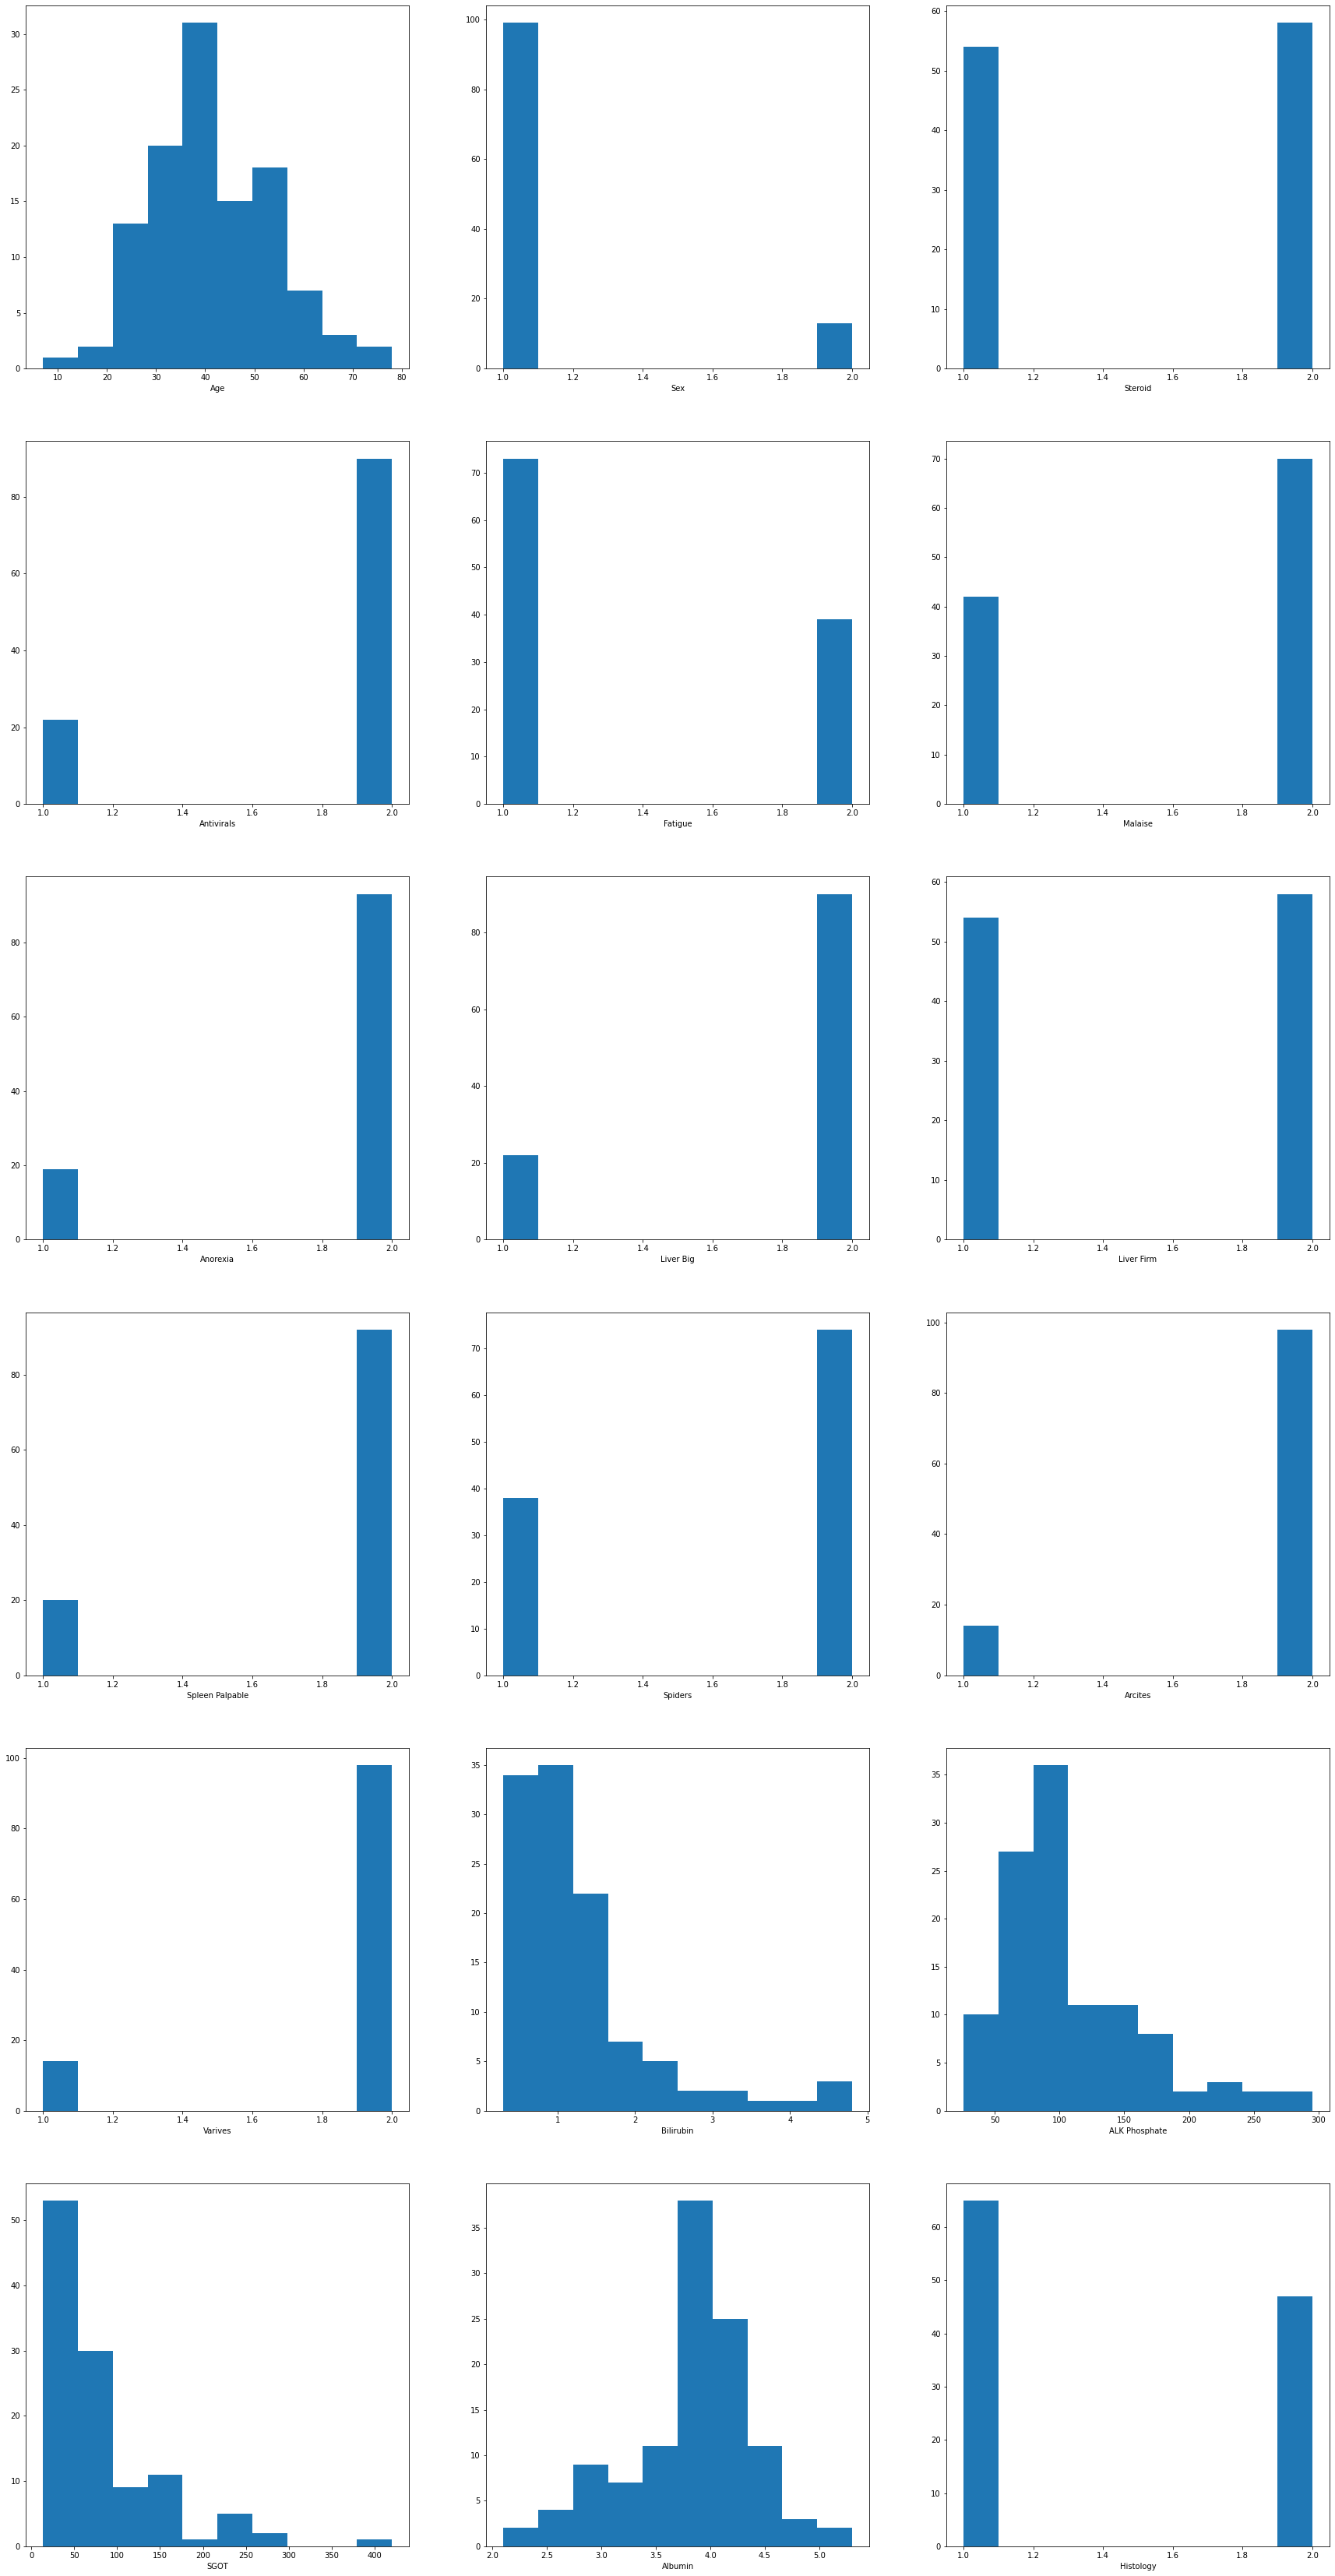

In [ ]:
fig, axs = plt.subplots(6,3,figsize=(30, 60))
print(hep_data.shape)
for i in range(1,19):
    axs[(i-1)//3,(i-1)%3].hist(hep_array[:,i])
    axs[(i-1)//3,(i-1)%3].set_xlabel(hep_data.iloc[0].index[i])

(1147, 19)


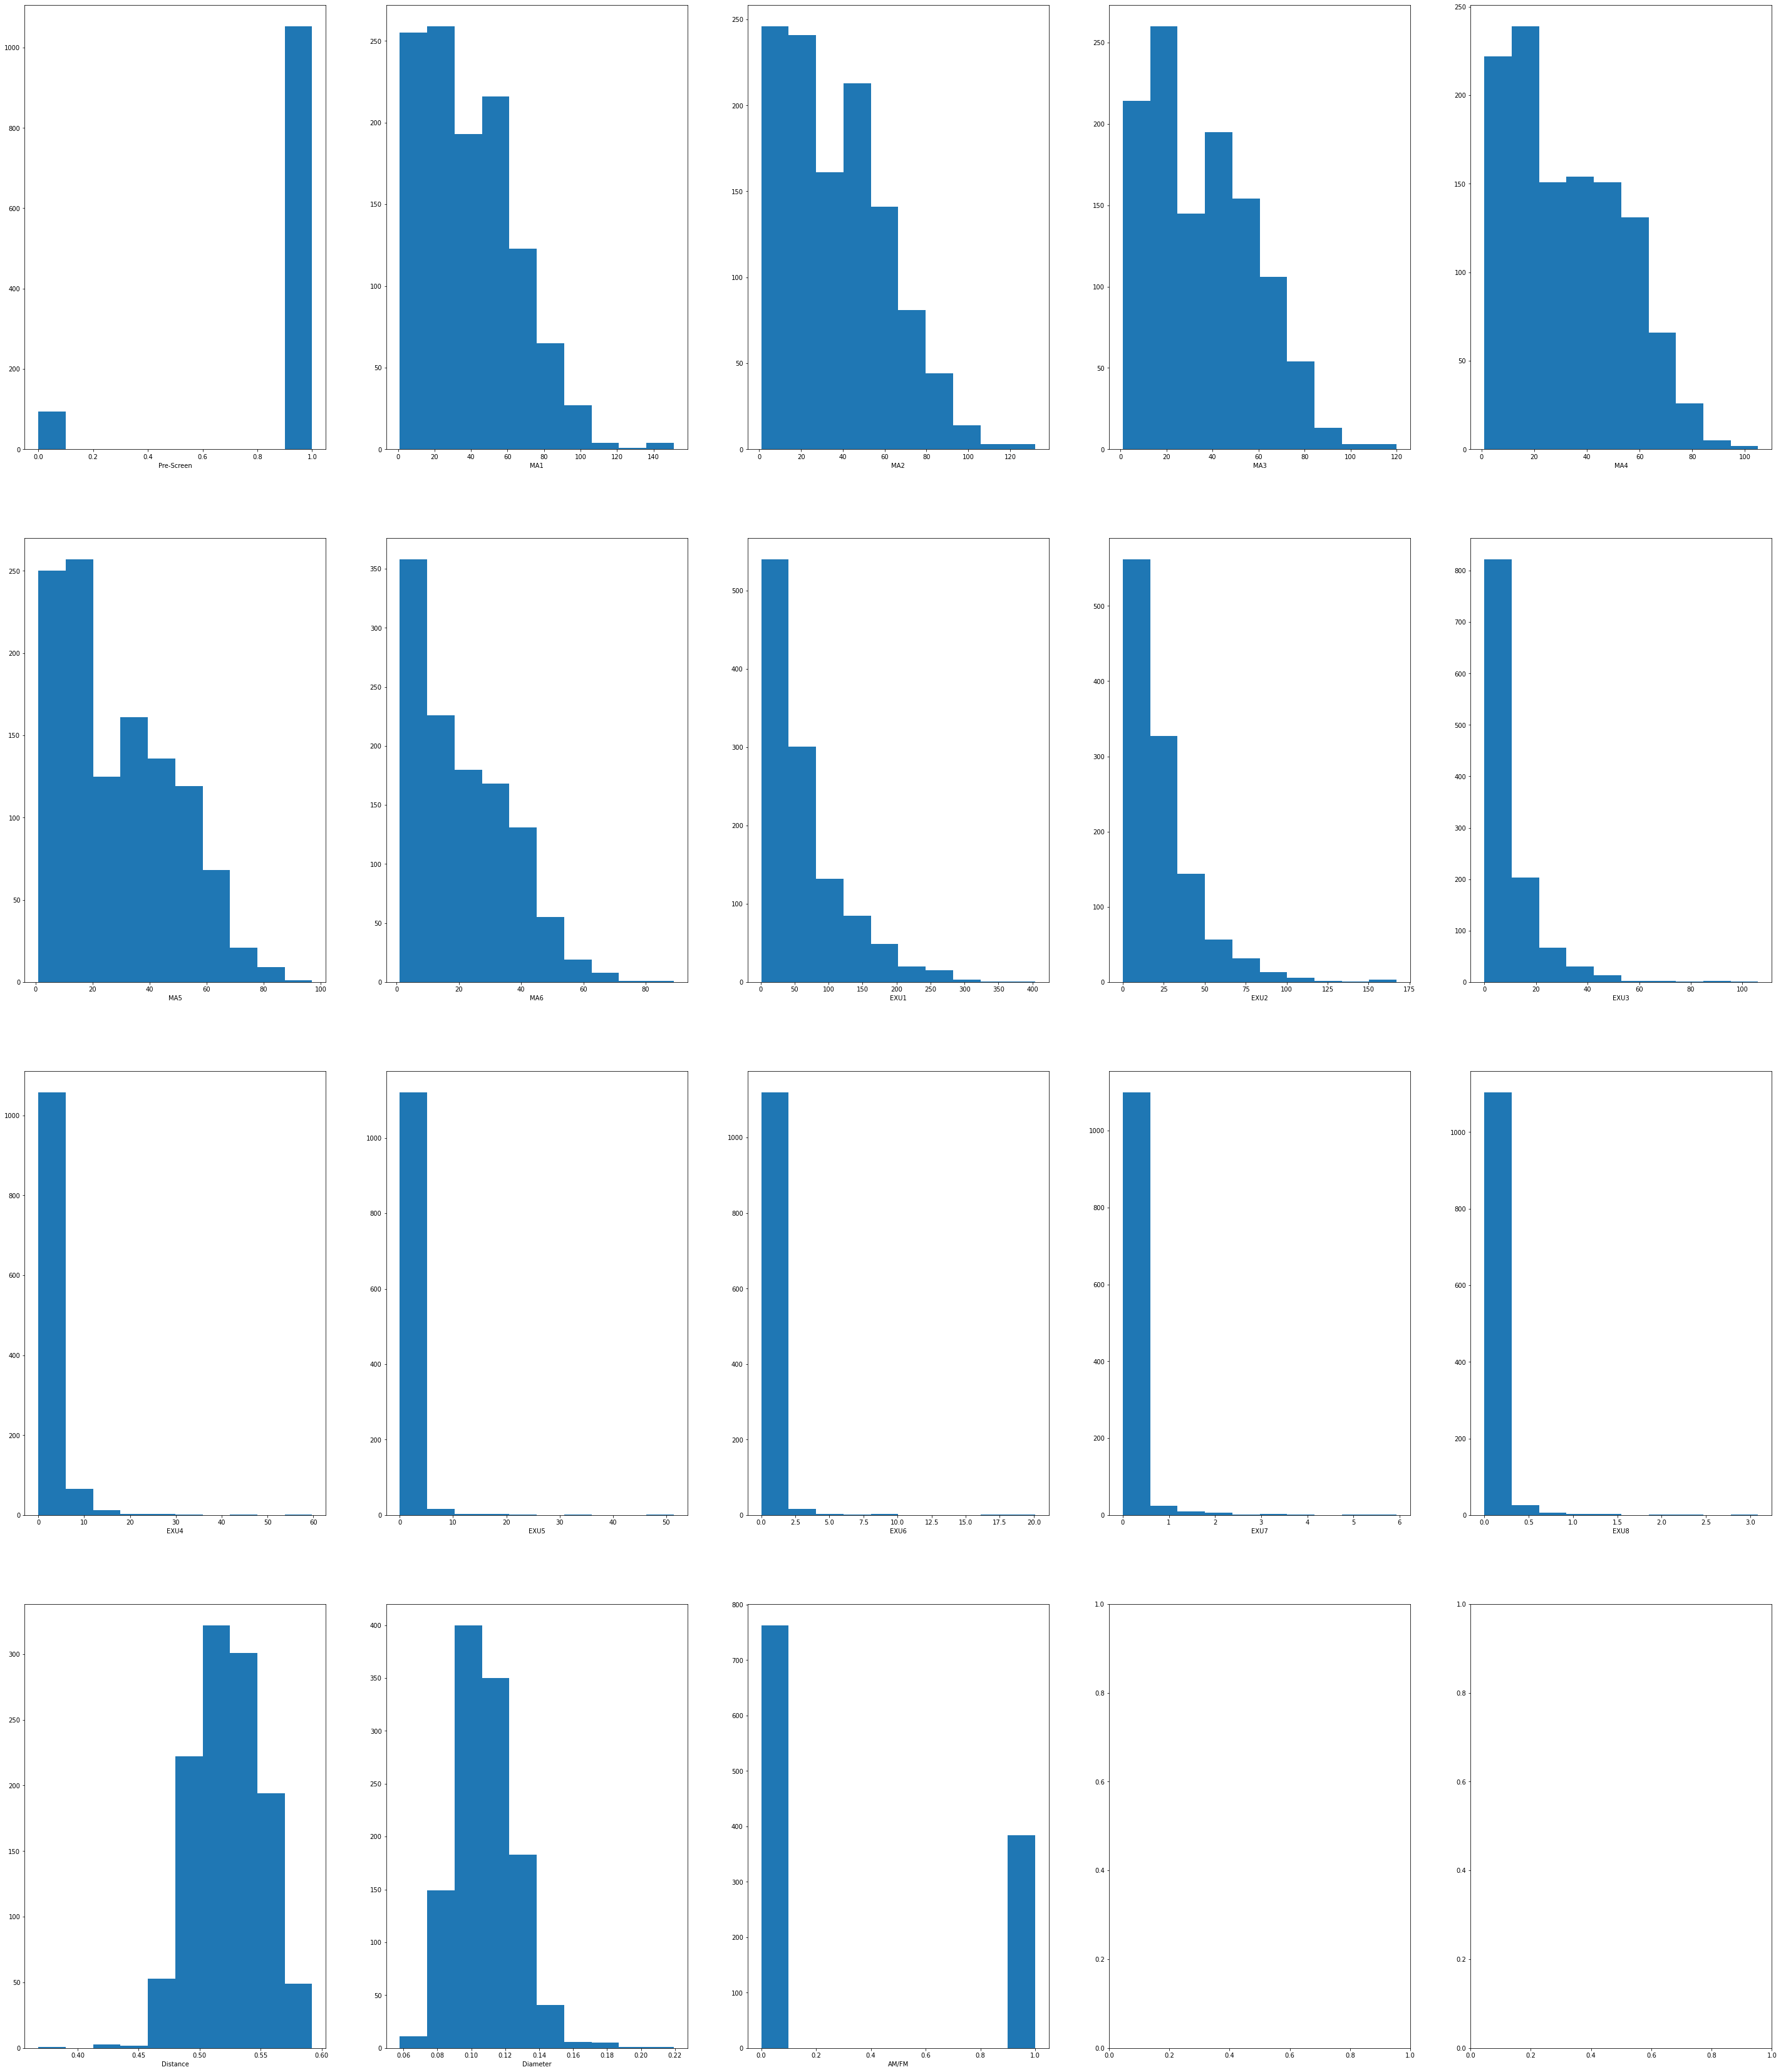

In [ ]:
fig, axs = plt.subplots(4,5,figsize=(50, 60))
print(mess_data.shape)
for i in range(1,19):
    axs[(i-1)//5,(i-1)%5].hist(mess_array[:,i])
    axs[(i-1)//5,(i-1)%5].set_xlabel(mess_data.iloc[0].index[i])

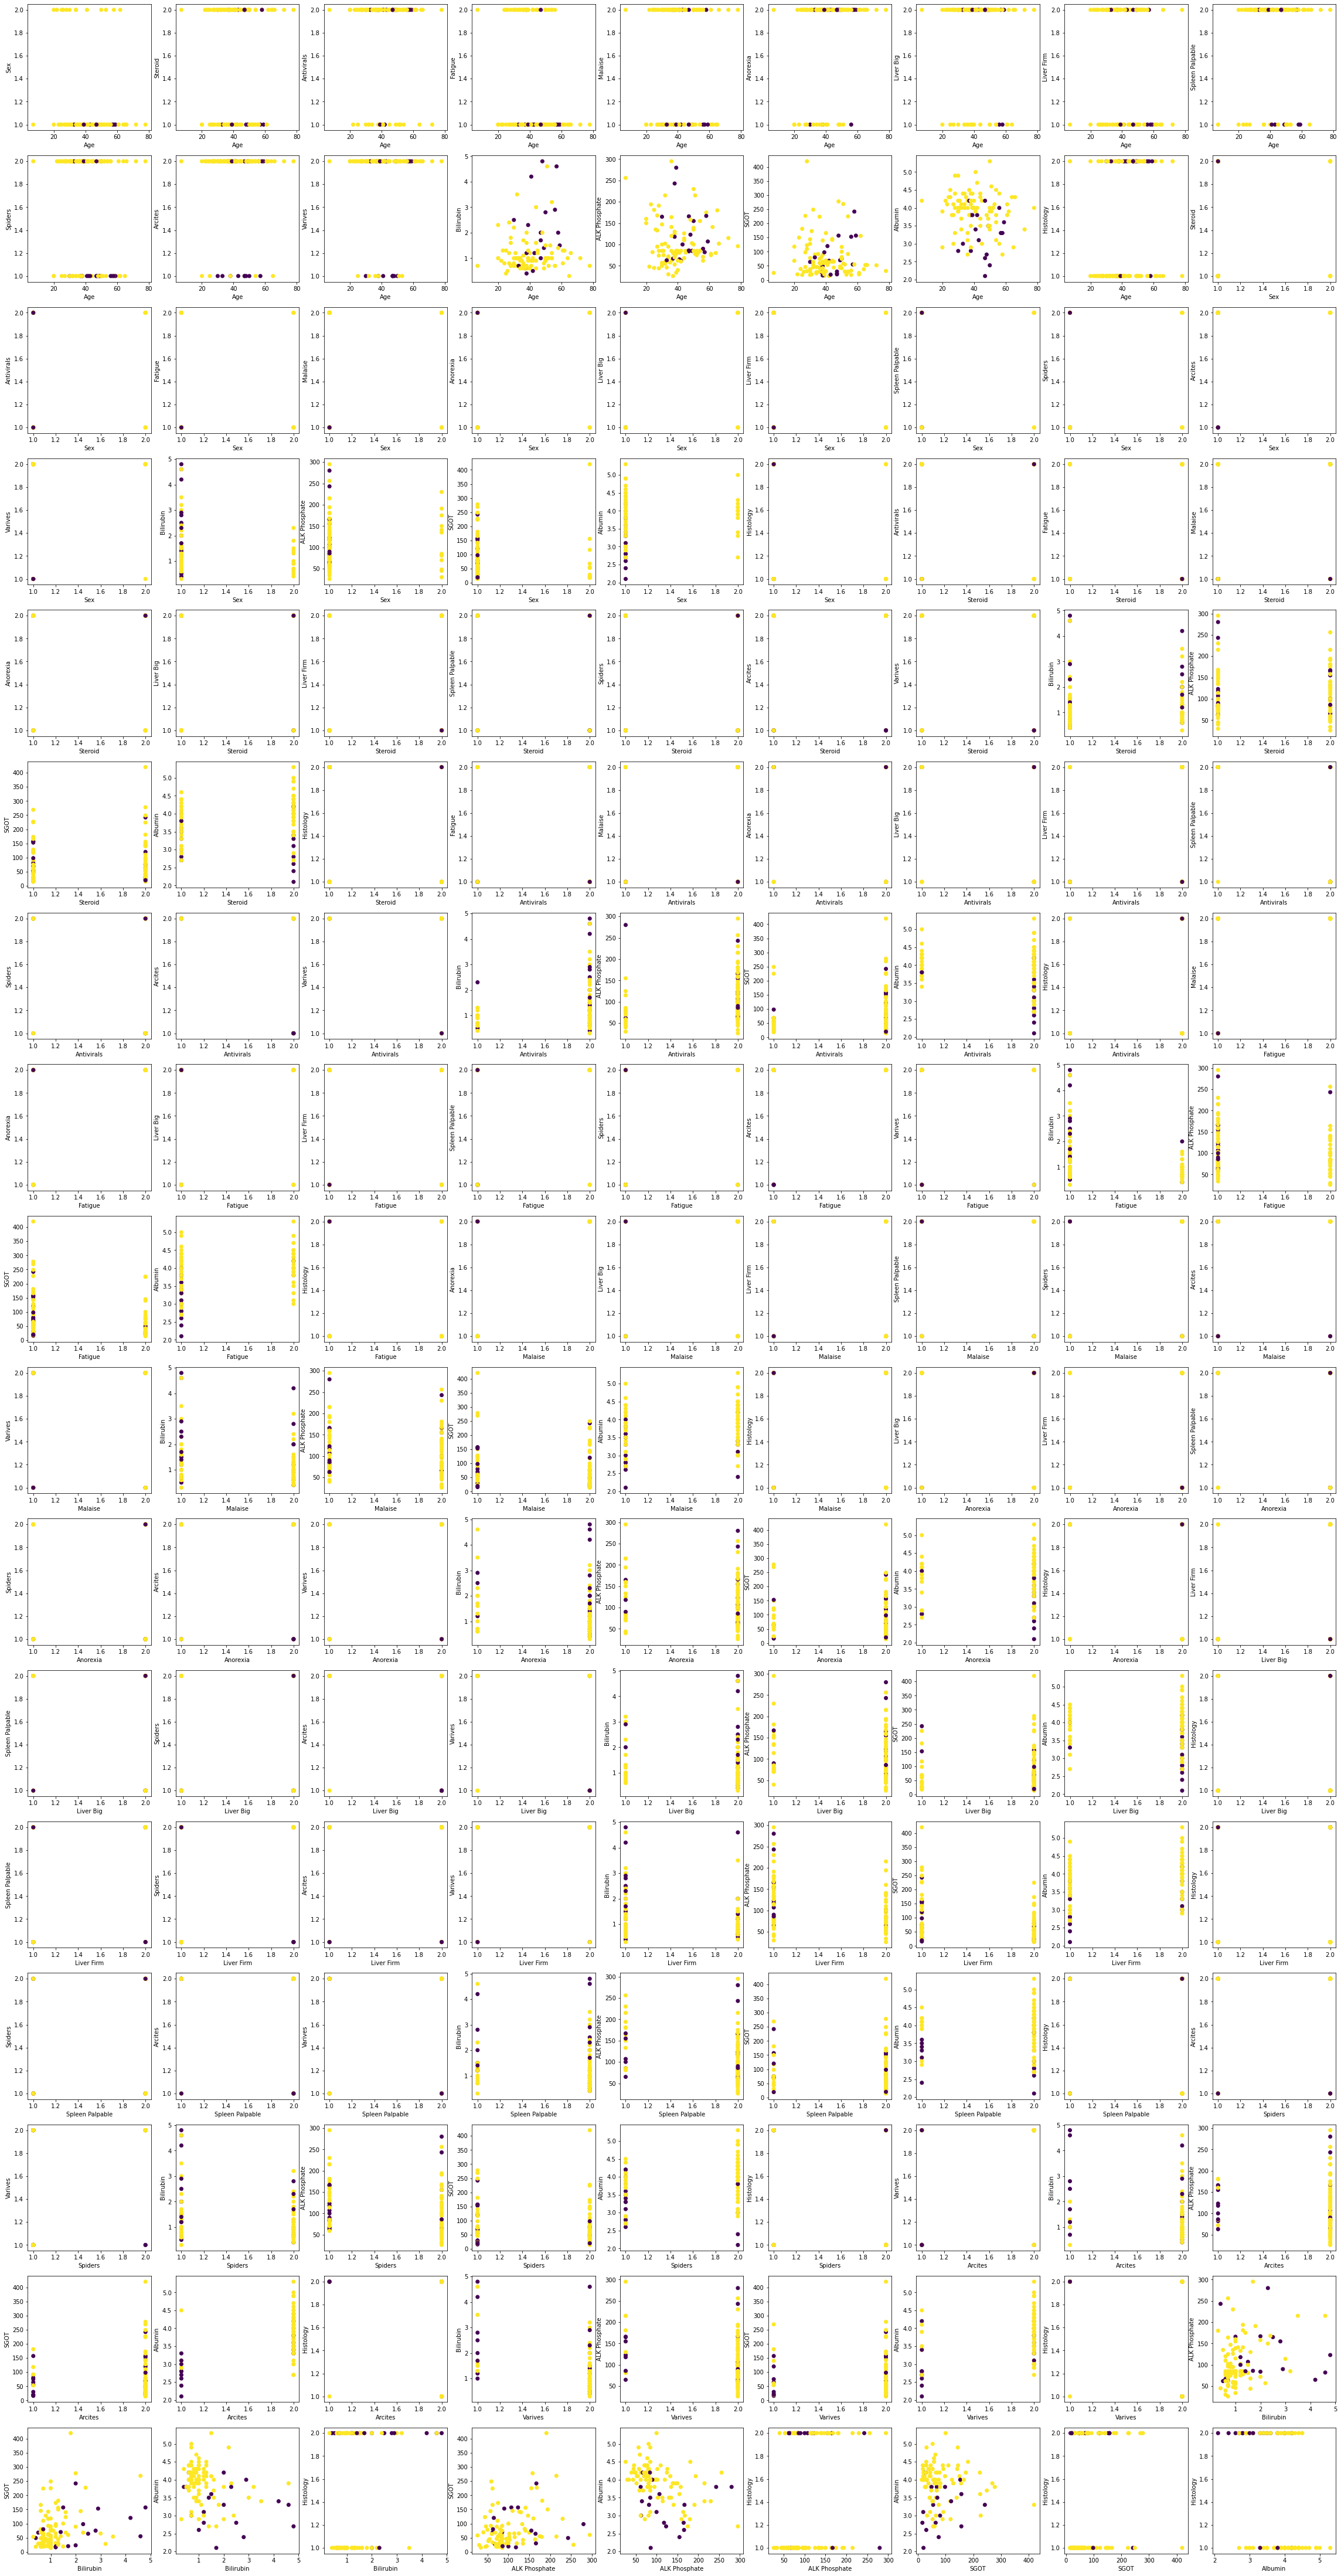

In [ ]:
# Visualize Hep Data
fig, axs = plt.subplots(17,9,figsize=(40, 80))
fake_i = fake_j = 0
for i in range(18):
    for j in range(i+1, 18):
        axs[fake_i,fake_j].scatter(x_hep_train[:,i], x_hep_train[:,j], c=y_hep_train, marker='o', label='train')
        axs[fake_i,fake_j].scatter(x_hep_val[:,i], x_hep_val[:,j], c=y_hep_val, marker='o', label='val')
        axs[fake_i,fake_j].scatter(x_hep_test[:,i], x_hep_test[:,j], c=y_hep_test, marker='o', label='test')
        axs[fake_i,fake_j].set_ylabel(hep_data.iloc[0].index[j+1])
        axs[fake_i,fake_j].set_xlabel(hep_data.iloc[0].index[i+1])
        fake_j += 1
        if fake_j >= 9:
            fake_j = 0
            fake_i += 1


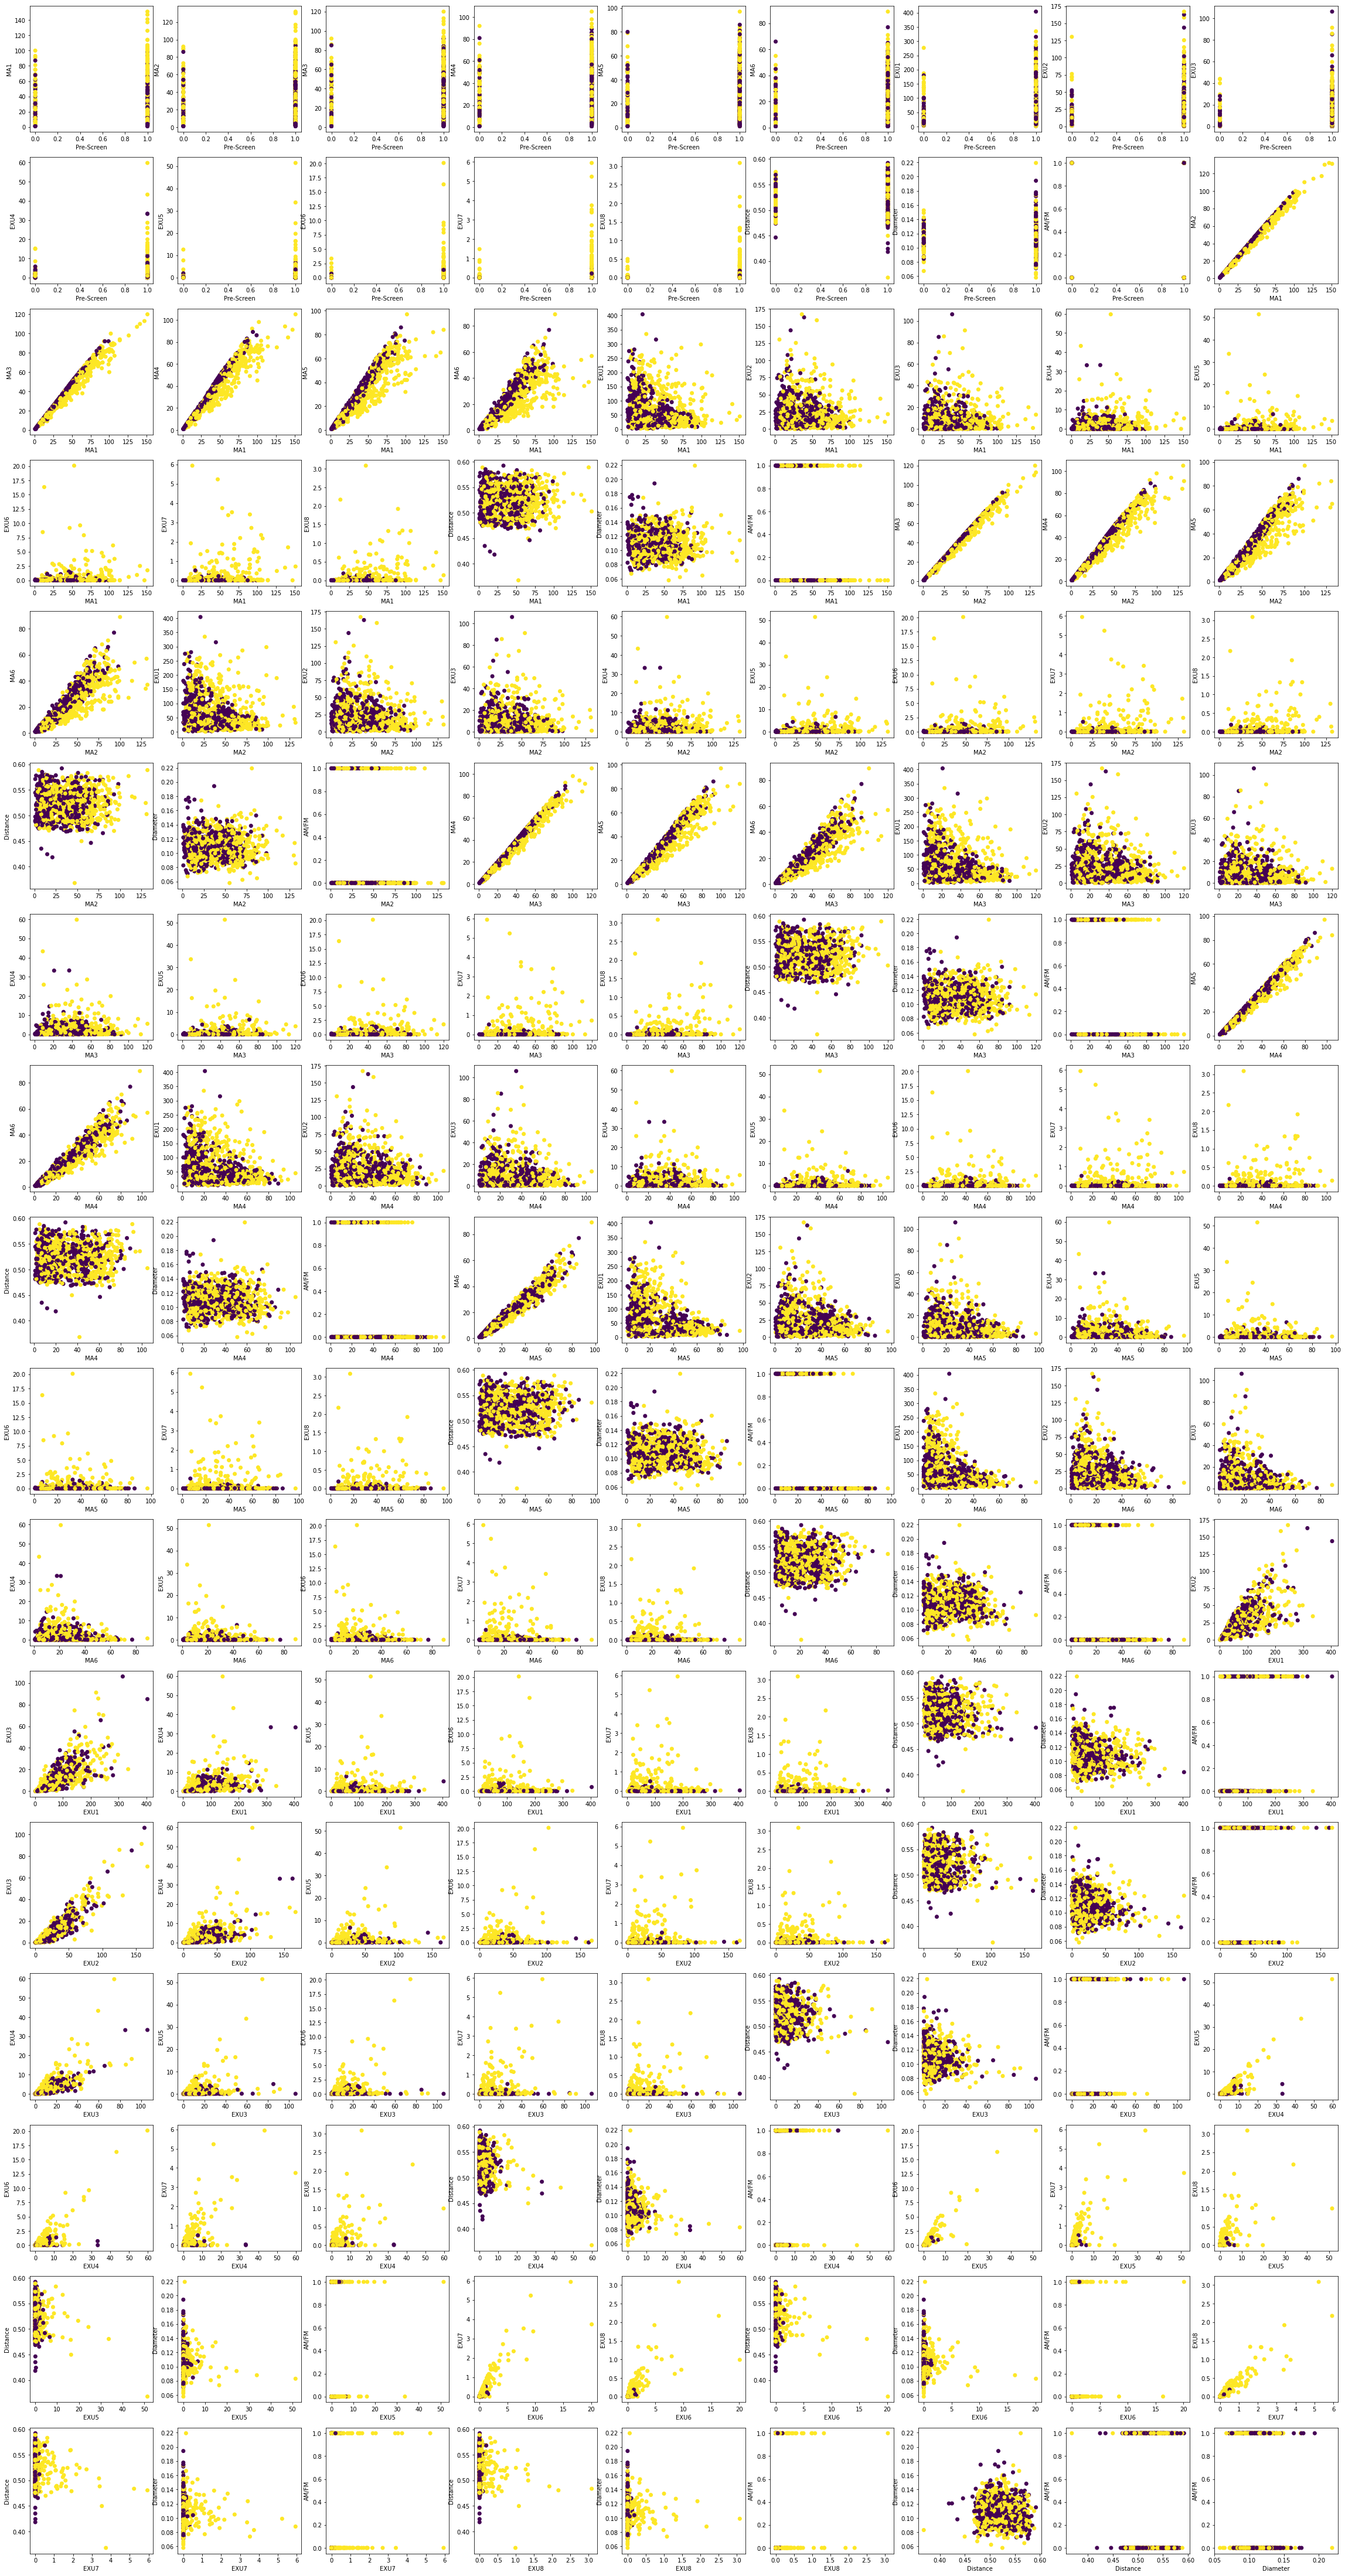

In [ ]:
# Visualize Mess Data
fig, axs = plt.subplots(17,9,figsize=(40, 80))
fake_i = fake_j = 0
for i in range(18):
    for j in range(i+1, 18):
        axs[fake_i,fake_j].scatter(x_mess_train[:,i], x_mess_train[:,j], c=y_mess_train, marker='o', label='train')
        axs[fake_i,fake_j].scatter(x_mess_val[:,i], x_mess_val[:,j], c=y_mess_val, marker='o', label='val')
        axs[fake_i,fake_j].scatter(x_mess_test[:,i], x_mess_test[:,j], c=y_mess_test, marker='o', label='test')
        axs[fake_i,fake_j].set_ylabel(mess_data.iloc[0].index[j+1])
        axs[fake_i,fake_j].set_xlabel(mess_data.iloc[0].index[i+1])
        fake_j += 1
        if fake_j >= 9:
            fake_j = 0
            fake_i += 1

# K Nearest Neighbours

In [ ]:
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
minkowski3 = lambda x1, x2: np.cbrt(np.sum((x1 - x2)**3, axis=-1))
minkowski4 = lambda x1, x2: np.power(np.sum((x1 - x2)**4, axis=-1), 0.25)
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = len(set(y))+1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
            
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

In [ ]:
def evaluate_acc(y_predict, y_test):
  correct = 0
  for i in range(len(y_predict)):
      if y_predict[i] == y_test[i]:
        correct += 1
  return correct / len(y_predict)

In [ ]:
def find_best_k(x_train, y_train, x_val, y_val):
  curmax = 0
  max_k = 1
  best_knn = None
  distance_functions = [(euclidean, "Euclid"), (manhattan, "Manhattan"), (minkowski3, "Minkowski3"), (minkowski4, "Minkowski4")]
  for distance_function in distance_functions:
    for i in range(1,16):
        knn = KNN(i, distance_function[0])
        knn = knn.fit(x_train, y_train)
        y_probs, knns = knn.predict(x_val)
        y_pred = np.argmax(y_probs, axis=-1)
        if evaluate_acc(y_pred, y_val) > curmax:
            curmax = evaluate_acc(y_pred, y_val)
            max_k = i
            best_knn = knn
            print("Best K:", max_k, "\t", "Best Function:", distance_function[1], "\t", "Best Accuracy:", evaluate_acc(y_pred, y_val))
  return best_knn

In [ ]:
best_hep_knn = find_best_k(x_hep_train, y_hep_train, x_hep_val, y_hep_val)
y_hep_test_probs, _ = best_hep_knn.predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_probs, axis=-1)

print("KNN Test Accuracy for Hepatitis Data:", evaluate_acc(y_hep_test_pred, y_hep_test))

best_mess_knn = find_best_k(x_mess_train, y_mess_train, x_mess_val, y_mess_val)
y_mess_test_probs, _ = best_mess_knn.predict(x_mess_test)
y_mess_test_pred = np.argmax(y_mess_test_probs, axis=-1)

print("KNN Test Accuracy for Messidor Data:", evaluate_acc(y_mess_test_pred, y_mess_test))

Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.7272727272727273
Best K: 3 	 Best Function: Euclid 	 Best Accuracy: 0.9090909090909091
KNN Test Accuracy for Hepatitis Data: 0.9130434782608695
Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.6506550218340611
Best K: 3 	 Best Function: Euclid 	 Best Accuracy: 0.6550218340611353
Best K: 11 	 Best Function: Euclid 	 Best Accuracy: 0.6593886462882096
Best K: 13 	 Best Function: Euclid 	 Best Accuracy: 0.6637554585152838
Best K: 3 	 Best Function: Manhattan 	 Best Accuracy: 0.6768558951965066
Best K: 15 	 Best Function: Manhattan 	 Best Accuracy: 0.6812227074235808
KNN Test Accuracy for Messidor Data: 0.6434782608695652


In [ ]:
best_hep_fewrm_knn = find_best_k(x_hep_fewrm_train, y_hep_fewrm_train, x_hep_fewrm_val, y_hep_fewrm_val)
y_hep_fewrm_test_probs, _ = best_hep_fewrm_knn.predict(x_hep_fewrm_test)
y_hep_fewrm_test_pred = np.argmax(y_hep_fewrm_test_probs, axis=-1)

print("KNN Test Accuracy for Hepatitis-Fewrm Data:", evaluate_acc(y_hep_fewrm_test_pred, y_hep_fewrm_test))

best_mess_fewrm_knn = find_best_k(x_mess_fewrm_train, y_mess_fewrm_train, x_mess_fewrm_val, y_mess_fewrm_val)
y_mess_fewrm_test_probs, _ = best_mess_fewrm_knn.predict(x_mess_fewrm_test)
y_mess_fewrm_test_pred = np.argmax(y_mess_fewrm_test_probs, axis=-1)

print("KNN Test Accuracy for Messidor-Fewrm Data:", evaluate_acc(y_mess_fewrm_test_pred, y_mess_fewrm_test))

Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.6818181818181818
Best K: 3 	 Best Function: Euclid 	 Best Accuracy: 0.8181818181818182
Best K: 7 	 Best Function: Euclid 	 Best Accuracy: 0.8636363636363636
KNN Test Accuracy for Hepatitis-Fewrm Data: 0.8695652173913043
Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.6200873362445415
Best K: 3 	 Best Function: Euclid 	 Best Accuracy: 0.62882096069869
Best K: 5 	 Best Function: Euclid 	 Best Accuracy: 0.6462882096069869
Best K: 11 	 Best Function: Euclid 	 Best Accuracy: 0.6550218340611353
Best K: 13 	 Best Function: Euclid 	 Best Accuracy: 0.6637554585152838
Best K: 14 	 Best Function: Euclid 	 Best Accuracy: 0.6681222707423581
Best K: 15 	 Best Function: Euclid 	 Best Accuracy: 0.6812227074235808
Best K: 11 	 Best Function: Minkowski4 	 Best Accuracy: 0.6943231441048034
KNN Test Accuracy for Messidor-Fewrm Data: 0.6608695652173913


In [ ]:
best_hep_manyrm_knn = find_best_k(x_hep_manyrm_train, y_hep_manyrm_train, x_hep_manyrm_val, y_hep_manyrm_val)
y_hep_manyrm_test_probs, _ = best_hep_manyrm_knn.predict(x_hep_manyrm_test)
y_hep_manyrm_test_pred = np.argmax(y_hep_manyrm_test_probs, axis=-1)

print("KNN Test Accuracy for Hepatitis-Manyrm Data:", evaluate_acc(y_hep_manyrm_test_pred, y_hep_manyrm_test))

best_mess_manyrm_knn = find_best_k(x_mess_manyrm_train, y_mess_manyrm_train, x_mess_manyrm_val, y_mess_manyrm_val)
y_mess_manyrm_test_probs, _ = best_mess_manyrm_knn.predict(x_mess_manyrm_test)
y_mess_manyrm_test_pred = np.argmax(y_mess_manyrm_test_probs, axis=-1)

print("KNN Test Accuracy for Messidor-Manyrm Data:", evaluate_acc(y_mess_manyrm_test_pred, y_mess_manyrm_test))

Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.6363636363636364
Best K: 3 	 Best Function: Euclid 	 Best Accuracy: 0.7272727272727273
Best K: 5 	 Best Function: Euclid 	 Best Accuracy: 0.7727272727272727
KNN Test Accuracy for Hepatitis-Manyrm Data: 0.8695652173913043
Best K: 1 	 Best Function: Euclid 	 Best Accuracy: 0.6899563318777293
Best K: 1 	 Best Function: Manhattan 	 Best Accuracy: 0.6986899563318777
KNN Test Accuracy for Messidor-Manyrm Data: 0.7043478260869566


# Decision Tree

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
      self.data = data
      self.labels = labels
      if self.num_classes is None:
          self.num_classes = 3
      #below are initialization of the root of the decision tree
      self.root = Node(np.arange(data.shape[0]), None)
      self.root.data = data
      self.root.labels = labels
      self.root.num_classes = self.num_classes
      self.root.depth = 0
      #to recursively build the rest of the tree
      self._fit_tree(self.root)
      return self

    def _fit_tree(self, node):
      #This gives the condition for termination of the recursion resulting in a leaf node
      if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
          return
      #greedily select the best test by minimizing the cost
      cost, split_feature, split_value = greedy_test(node, self.cost_fn)
      #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
      if np.isinf(cost):
          return
      #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
      #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
      test = node.data[node.data_indices,split_feature] <= split_value
      #store the split feature and value of the node
      node.split_feature = split_feature
      node.split_value = split_value
      #define new nodes which are going to be the left and right child of the present node
      left = Node(node.data_indices[test], node)
      right = Node(node.data_indices[np.logical_not(test)], node)
      #recursive call to the _fit_tree()
      self._fit_tree(left)
      self._fit_tree(right)
      #assign the left and right child to present child
      node.left = left
      node.right = right
    
    def predict(self, data_test):
      class_probs = np.zeros((data_test.shape[0], self.num_classes))
      for n, x in enumerate(data_test):
          node = self.root
          #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
          while node.left:
              if x[node.split_feature] <= node.split_value:
                  node = node.left
              else:
                  node = node.right
          #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
          class_probs[n,:] = node.class_prob
      return class_probs

In [ ]:
def find_best_tree(x_train, y_train, x_val, y_val):
    depths = [x for x in range(1, 11, 2)]
    functions = [(cost_entropy, "Entropy"), (cost_gini_index, "Gini"), (cost_misclassification, "Misclassification")]
    curmax = 0
    best_tree = None

    for depth in depths:
        for function in functions:
            dt = DecisionTree(None, depth, function[0])
            dt = dt.fit(x_train, y_train)
            y_probs = dt.predict(x_val)
            y_pred = np.argmax(y_probs, 1)
            if evaluate_acc(y_pred, y_val) > curmax:
                curmax = evaluate_acc(y_pred, y_val)
                best_tree = dt
                print("Best Depth:", depth, "\t", "Best Function:", function[1], "\t", "Best Accuracy:", evaluate_acc(y_pred, y_val))
    return best_tree

In [ ]:
best_hep_dt = find_best_tree(x_hep_train, y_hep_train, x_hep_val, y_hep_val)
y_hep_test_probs = best_hep_dt.predict(x_hep_test)
y_hep_test_pred = np.argmax(y_hep_test_probs, axis=1)

print("DT Test Accuracy for Hepatitis Data:", evaluate_acc(y_hep_test_pred, y_hep_test))

best_mess_dt = find_best_tree(x_mess_train, y_mess_train, x_mess_val, y_mess_val)
y_mess_test_probs = best_mess_dt.predict(x_mess_test)
y_mess_test_pred = np.argmax(y_mess_test_probs, axis=1)

print("DT Test Accuracy for Messidor Data:", evaluate_acc(y_mess_test_pred, y_mess_test))

Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.5909090909090909
Best Depth: 1 	 Best Function: Misclassification 	 Best Accuracy: 0.8181818181818182
DT Test Accuracy for Hepatitis Data: 0.9565217391304348
Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.5589519650655022
Best Depth: 1 	 Best Function: Misclassification 	 Best Accuracy: 0.611353711790393
Best Depth: 3 	 Best Function: Entropy 	 Best Accuracy: 0.6244541484716157
Best Depth: 9 	 Best Function: Entropy 	 Best Accuracy: 0.6419213973799127
DT Test Accuracy for Messidor Data: 0.6260869565217392


In [ ]:
best_hep_fewrm_dt = find_best_tree(x_hep_fewrm_train, y_hep_fewrm_train, x_hep_fewrm_val, y_hep_fewrm_val)
y_hep_fewrm_test_probs = best_hep_fewrm_dt.predict(x_hep_fewrm_test)
y_hep_fewrm_test_pred = np.argmax(y_hep_fewrm_test_probs, axis=1)

print("DT Test Accuracy for Hepatitis-Fewrm Data:", evaluate_acc(y_hep_fewrm_test_pred, y_hep_fewrm_test))

best_mess_fewrm_dt = find_best_tree(x_mess_fewrm_train, y_mess_fewrm_train, x_mess_fewrm_val, y_mess_fewrm_val)
y_mess_fewrm_test_probs = best_mess_fewrm_dt.predict(x_mess_fewrm_test)
y_mess_fewrm_test_pred = np.argmax(y_mess_fewrm_test_probs, axis=1)

print("DT Test Accuracy for Messidor-Fewrm Data:", evaluate_acc(y_mess_fewrm_test_pred, y_mess_fewrm_test))

Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.8636363636363636
DT Test Accuracy for Hepatitis-Fewrm Data: 0.8695652173913043
Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.5938864628820961
Best Depth: 3 	 Best Function: Entropy 	 Best Accuracy: 0.6550218340611353
Best Depth: 3 	 Best Function: Gini 	 Best Accuracy: 0.6943231441048034
DT Test Accuracy for Messidor-Fewrm Data: 0.6173913043478261


In [ ]:
best_hep_manyrm_dt = find_best_tree(x_hep_manyrm_train, y_hep_manyrm_train, x_hep_manyrm_val, y_hep_manyrm_val)
y_hep_manyrm_test_probs = best_hep_manyrm_dt.predict(x_hep_manyrm_test)
y_hep_manyrm_test_pred = np.argmax(y_hep_manyrm_test_probs, axis=1)

print("DT Test Accuracy for Hepatitis-Manyrm Data:", evaluate_acc(y_hep_manyrm_test_pred, y_hep_manyrm_test))

best_mess_manyrm_dt = find_best_tree(x_mess_manyrm_train, y_mess_manyrm_train, x_mess_manyrm_val, y_mess_manyrm_val)
y_mess_manyrm_test_probs = best_mess_manyrm_dt.predict(x_mess_manyrm_test)
y_mess_manyrm_test_pred = np.argmax(y_mess_manyrm_test_probs, axis=1)

print("DT Test Accuracy for Messidor-Manyrm Data:", evaluate_acc(y_mess_manyrm_test_pred, y_mess_manyrm_test))

Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.5909090909090909
Best Depth: 1 	 Best Function: Misclassification 	 Best Accuracy: 0.7727272727272727
Best Depth: 3 	 Best Function: Misclassification 	 Best Accuracy: 0.8181818181818182
DT Test Accuracy for Hepatitis-Manyrm Data: 0.8260869565217391
Best Depth: 1 	 Best Function: Entropy 	 Best Accuracy: 0.5458515283842795
Best Depth: 1 	 Best Function: Gini 	 Best Accuracy: 0.5589519650655022
Best Depth: 1 	 Best Function: Misclassification 	 Best Accuracy: 0.6157205240174672
Best Depth: 5 	 Best Function: Misclassification 	 Best Accuracy: 0.6593886462882096
DT Test Accuracy for Messidor-Manyrm Data: 0.6


In [ ]:
def scatter(x, y_train, x_train, top_corr_vals, top_corr_vals_names):
  #x = hep_array[:,1:]

  #we can make the grid finer by increasing the number of samples from 200 to higher value
  x0v = np.linspace(np.min(x[:,top_corr_vals[0]]), np.max(x[:,top_corr_vals[0]]), 200)
  x1v = np.linspace(np.min(x[:,top_corr_vals[1]]), np.max(x[:,top_corr_vals[1]]), 200)

  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  knn = KNN(K=2)

  y_train_prob = np.zeros((y_train.shape[0], 3))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = knn.fit(x_train[:,top_corr_vals], y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  plt.scatter(x_train[:,top_corr_vals[0]], x_train[:,top_corr_vals[1]], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all, marker='.', alpha=0.01)
  plt.ylabel(top_corr_vals_names[1])
  plt.xlabel(top_corr_vals_names[0])
  plt.show()

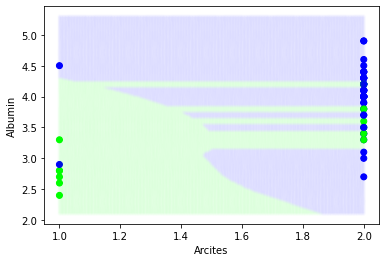

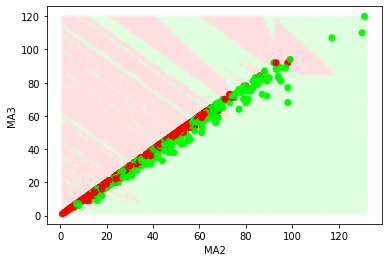

In [ ]:
scatter(hep_array[:,1:], y_hep_train, x_hep_train, top_hep_vals, top_hep_vals_names)
scatter(mess_array[:,1:], y_mess_train, x_mess_train, top_mess_vals, top_mess_vals_names)

In [ ]:
def scatter_decision(x, y_train, x_train, top_corr_vals, top_corr_vals_names):
  #x = hep_array[:,1:]
  #we can make the grid finer by increasing the number of samples from 200 to higher value
  x0v = np.linspace(np.min(x[:,top_corr_vals[0]]), np.max(x[:,top_corr_vals[0]]), 200)
  x1v = np.linspace(np.min(x[:,top_corr_vals[1]]), np.max(x[:,top_corr_vals[1]]), 200)

  #to features values as a mesh  
  x0, x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T

  model = DecisionTree(max_depth=200)

  y_train_prob = np.zeros((y_train.shape[0], 3))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all = model.fit(x_train[:,top_corr_vals], y_train).predict(x_all)

  plt.scatter(x_train[:,top_corr_vals[0]], x_train[:,top_corr_vals[1]], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=0.01)
  plt.ylabel(top_corr_vals_names[1])
  plt.xlabel(top_corr_vals_names[0])
  plt.show()

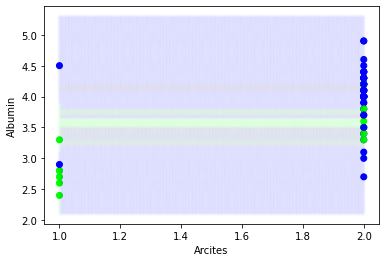

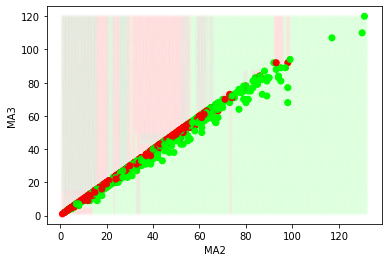

In [ ]:
scatter_decision(hep_array[:,1:], y_hep_train, x_hep_train, top_hep_vals, top_hep_vals_names)
scatter_decision(mess_array[:,1:], y_mess_train, x_mess_train, top_mess_vals, top_mess_vals_names)